<h2> GROUP 16 - Assignment (Fundamentals of Machine Learning)

Team Members
- Arsha Jimmy
- Lalith Balasubramanian
- Prashant Ronsa (202251507)
- Reshma Sooraj
- Sidharth
- Vaisakh Constantine Francis

<H3> Kaggle Competition | CS985/6 Spotify Regression & Classification Problem 2023

Music is an important part of human life because it serves as a tool for entertainment, relaxation, and communication. The introduction of digital music streaming platforms, particularly Spotify, has revolutionised the music industry in recent years, allowing music fans worldwide easy access to millions of songs. The purpose of this academic report is to investigate the effects of songs and Spotify on the music industry, artists, and listeners. The report will look at how the platform has changed the way people discover and consume music, its role in artist promotion and revenue generation, and the influence of its algorithm on music trends. It will also assess the platform's dominance in the music industry and the industry's future prospects.

<h4> Objective

- Regression problem that aims to predict the popularity score of a song
- Classification problem that aims to predict the top genre that a song belongs to

This Notebook will provide fundamental explanations of:

Data Handling

- Importing Data with Pandas
- Data cleaning
- Analysing the data
- Using Matplotlib to visualize data

Machine learning Techniques:


Libraries used:

- NumPy
- Pandas
- SciKit-Learn
- Matplotlib
- OneHotEncoder
- OrdinalEncoder
- RobustScaler
- StandardScaler
- Metrics
- Seaborn
- Scipy
- Sklearn.decomposition

This report will follow:

Description of the solution (based on comments and code):
- Explanation of your solution and setup (packages, algorithms etc. used, data analysis and preparation)
- Justification for the choices (rationale for the models used, which may also be based on your analysis of the data)
- Explanation of the various models tried (what worked, what didn't, and why)

Code quality
- Readability, configurability (how easily it can be adapted to other models, problems etc.), structure
- Correspondence to solution
- How cleanly it runs

Performance
- Performance on the Training Data should be reported in the report (and the code should produce the values reported).
- Performance on the Kaggle Test Data should be reported in the text
- Explanation of the difference
- Relative performance in comparison to other solutions

# Starting with the first - Regression Problem

<h3> Importing necessary pacakages for analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,RobustScaler, StandardScaler
from sklearn import metrics
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.decomposition import PCA

<h3> Importing csv file

In [6]:
data = pd.read_csv("CS98XRegressionTrain.csv")
data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


After importing csv file, it is best to look at the data first

In [7]:
data.shape

(453, 15)

From this we can understand that the data contains 15 columns (features) & 453 rows (tuples)

<h3> Renaming 'pop' column to 'popularity'

In [108]:
data.rename({'pop': 'popularity'}, axis=1, inplace=True)

In [109]:
data.duplicated().sum()

0

<h3> Checking if there are any null values

In [110]:
data.isnull().sum()

Id             0
title          0
artist         0
top genre     15
year           0
bpm            0
nrgy           0
dnce           0
dB             0
live           0
val            0
dur            0
acous          0
spch           0
popularity     0
dtype: int64

- Column 'top genre' has different genre information all songs & since there are null values in column, we're going to fill them with 'unassigned' genre

In [111]:
data['top genre'] = data['top genre'].fillna('unassigned')

In [112]:
data.isnull().sum()

Id            0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
popularity    0
dtype: int64

This tells that we don't have any null values now

In [8]:
data

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


<h3> Checking Correlation 

This is done to understand the relationship between all the features and identify which has more or less impact influenci

<AxesSubplot:>

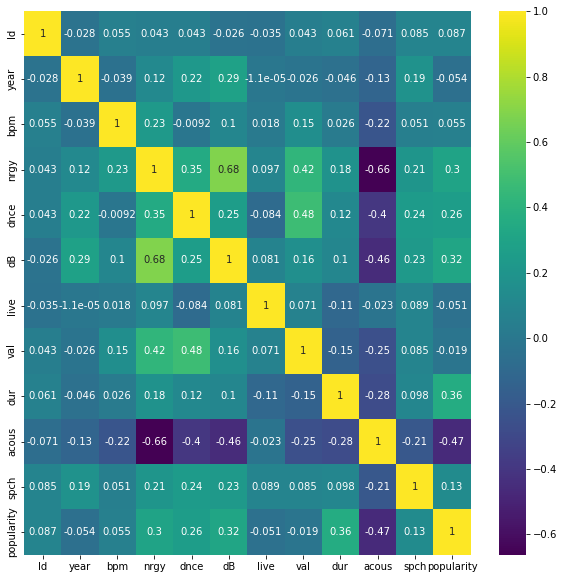

In [116]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

The above matrix implies that there's 'live', 'val' 'year', 'acous', 'spch' & 'bpm have negative to low corelation to popularity therefore they can be removed

<h2> Preprocessing and feature engineering


In [12]:
# data.drop(columns=['bpm','live','val','spch'],axis=1,inplace=True)

In [13]:
# #Duration seems to be in seconds, convert it to minutes
# data['dur'] = data['dur'].apply(lambda x: round(x/60,2))
# data.head()

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          453 non-null    int64 
 1   title       453 non-null    object
 2   artist      453 non-null    object
 3   top genre   453 non-null    object
 4   year        453 non-null    int64 
 5   bpm         453 non-null    int64 
 6   nrgy        453 non-null    int64 
 7   dnce        453 non-null    int64 
 8   dB          453 non-null    int64 
 9   live        453 non-null    int64 
 10  val         453 non-null    int64 
 11  dur         453 non-null    int64 
 12  acous       453 non-null    int64 
 13  spch        453 non-null    int64 
 14  popularity  453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [15]:
# data['title_length'] = data['title'].str.len()

<h3> Dropping column 'Id' & 'title' from that dataframe

In [118]:
data.drop(['Id','title'],axis=1,inplace=True)

In [119]:
data.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [120]:
data

,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,The Teddy Bears,unassigned,2011,114,44,53,-8,13,47,139,49,3,37
2,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


In [121]:
data['top genre'].isna().values.sum()

0

In [20]:
# #Null values in top genre column delete it
# data.dropna(inplace=True)

In [122]:
data.shape

(453, 13)

<h3> Splitting column 'top genre' to genre since it a string & has space between

In [123]:
genre = (data["top genre"].str.strip()).str.lower()
gen = genre.str.split(" ",0)
new_genre = []
for i in gen:
    new_genre.append(i[-1])
new_genre=np.array(new_genre)
data['genre'] = new_genre.tolist()
data.drop(columns=['top genre'],axis=1,inplace=True)

In [126]:
data['genre'].value_counts()

rock             118
pop              107
standards         74
hop               16
unassigned        15
europop           14
soul              12
band              11
dance              9
invasion           8
disco              7
eurodance          6
blues              4
house              4
doo-wop            4
folk               4
funk               4
metal              4
chanson            2
bebop              2
merseybeat         2
room               2
wave               2
rap                2
country            1
hi-nrg             1
group              1
yodeling           1
afropop            1
trance             1
gold               1
jazz               1
revival            1
comedy             1
latin              1
boogaloo           1
r&b                1
afrobeat           1
garage             1
mellow             1
show               1
britpop            1
rock-and-roll      1
punk               1
Name: genre, dtype: int64

In [127]:
v = data['genre'].value_counts()
data.loc[data['genre'].isin(v[v<3].index), 'genre'] = 'others'

In [128]:
data.isna().sum()

artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
popularity    0
genre         0
dtype: int64

In [130]:
data['genre'].unique()

array(['standards', 'unassigned', 'rock', 'pop', 'band', 'others',
       'europop', 'disco', 'blues', 'house', 'hop', 'dance', 'soul',
       'doo-wop', 'invasion', 'folk', 'funk', 'eurodance', 'metal'],
      dtype=object)

In [129]:
data

,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,genre
0,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,standards
1,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,unassigned
2,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,standards
3,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,standards
4,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,standards
449,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,pop
450,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,pop
451,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,band


In [29]:
# #Lable encode genre
# from sklearn.preprocessing import LabelEncoder

# #create instance of label encoder
# lab = LabelEncoder()
# data['genre'] = lab.fit_transform(data['genre'])
# # data.drop(columns=['top genre'],axis=1,inplace=True)

In [30]:
# #one hot
# from sklearn.preprocessing import OneHotEncoder
# onehot = OneHotEncoder(handle_unknown="ignore")
# genre_array = onehot.fit_transform(data[['genre']]).toarray()
# genre_label = np.array(onehot.categories_).ravel()
# genre_split = pd.DataFrame(genre_array, columns=genre_label)
# data = pd.concat([data,genre_split],axis=1)
# data.drop(['genre'], axis=1, inplace=True)
# # ohe = OneHotEncoder(handle_unknown='ignore')
# # ohe_columns = pd.DataFrame(ohe.fit_transform(data[["genre"]]).toarray())

In [131]:
#Artist one hot
# count = data['artist'].value_counts()

# data['value_count'] = data['artist'].apply(lambda x: count[x])
# data['artist'] = data['value_count'].apply(lambda x: round(x/7,2))
# data.drop(columns=['value_count'],axis=1,inplace=True)
# data.drop(columns=['artist'],axis=1,inplace=True)

# artist_count = data["artist"].value_counts().to_dict()
# data['artist_count'] = data["artist"].map(artist_count)
# data.drop(columns=['artist'],axis=1,inplace=True)

artist_stats = data.groupby("artist").agg({"nrgy": "mean", "dnce": "mean","dB": "mean","acous": "mean"
                                                   ,"spch": "mean"}).to_dict()
data["artist_nrgy_mean"] = data["artist"].map(artist_stats["nrgy"])
data["artist_dnce_mean"] = data["artist"].map(artist_stats["dnce"])
data["artist_dB_mean"] = data["artist"].map(artist_stats["dB"])
data["artist_acous_mean"] = data["artist"].map(artist_stats["acous"])
data["artist_spch_mean"] = data["artist"].map(artist_stats["spch"])
data.drop(columns=['artist'],axis=1,inplace=True)

In [132]:
data

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,genre,artist_nrgy_mean,artist_dnce_mean,artist_dB_mean,artist_acous_mean,artist_spch_mean
0,1996,107,31,45,-8,13,28,150,75,3,44,standards,31.000000,45.000000,-8.000000,75.000000,3.000000
1,2011,114,44,53,-8,13,47,139,49,3,37,unassigned,36.500000,51.000000,-9.000000,67.500000,3.000000
2,1979,105,36,63,-9,13,67,245,11,3,77,standards,36.000000,63.000000,-9.000000,11.000000,3.000000
3,1980,170,28,47,-16,13,33,232,25,3,67,standards,30.666667,45.666667,-16.000000,40.666667,3.333333
4,1973,121,47,56,-8,15,40,193,45,3,63,rock,54.333333,63.000000,-9.444444,36.555556,3.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,1959,80,22,18,-17,10,16,214,92,4,45,standards,14.500000,23.000000,-20.500000,92.500000,6.000000
449,2010,148,81,53,-13,23,96,147,50,3,50,pop,73.000000,50.000000,-13.500000,55.000000,3.000000
450,2002,168,55,73,-8,20,61,289,23,14,77,pop,55.000000,73.000000,-8.000000,23.000000,14.000000
451,2000,165,87,64,-5,6,88,191,5,8,62,band,87.000000,64.000000,-5.000000,5.000000,8.000000


In [133]:
data.columns

Index(['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous',
       'spch', 'popularity', 'genre', 'artist_nrgy_mean', 'artist_dnce_mean',
       'artist_dB_mean', 'artist_acous_mean', 'artist_spch_mean'],
      dtype='object')

<h3> Using StandardScaler to remove the mean and scale each feature to a unit variance

In [135]:
scl_attr = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch','artist_nrgy_mean', 'artist_dnce_mean',
       'artist_dB_mean', 'artist_acous_mean', 'artist_spch_mean']
# scl_attr = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
#        'acous', 'spch']
# data_train[scl_attr] = std_scaler.fit_transform(data_train[scl_attr])

# scaler = RobustScaler()
# robust_df = scaler.fit(data[scl_attr])
# robust_df_scaled = scaler.transform(data[scl_attr])
# data[scl_attr] = pd.DataFrame(robust_df_scaled)

scaler = StandardScaler()
std_df = scaler.fit(data[scl_attr])
std_df_scaled = scaler.transform(data[scl_attr])
data[scl_attr] = pd.DataFrame(std_df_scaled)
data.head(10)

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,genre,artist_nrgy_mean,artist_dnce_mean,artist_dB_mean,artist_acous_mean,artist_spch_mean
0,0.271894,-0.452169,-1.310624,-0.941668,0.234142,-0.344348,-1.283649,-1.197460,1.424453,-0.479767,44,standards,-1.392883,-1.043768,0.245502,1.521956,-0.500400
1,1.167012,-0.174511,-0.724531,-0.424450,0.234142,-0.344348,-0.508542,-1.370145,0.543019,-0.479767,37,unassigned,-1.129358,-0.613795,-0.047934,1.250292,-0.500400
2,-0.742572,-0.531500,-1.085204,0.222073,-0.045716,-0.344348,0.307359,0.293907,-0.745230,-0.479767,77,standards,-1.153315,0.246151,-0.047934,-0.796240,-0.500400
3,-0.682898,2.046756,-1.445876,-0.812364,-2.004725,-0.344348,-1.079673,0.089825,-0.270612,-0.479767,67,standards,-1.408855,-0.995993,-2.101987,0.278340,-0.437695
4,-1.100619,0.103148,-0.589278,-0.230493,0.234142,-0.199578,-0.794108,-0.522420,0.407414,-0.479767,63,rock,-0.274896,0.246151,-0.178350,0.129428,-0.458596
5,1.107337,-0.333172,-0.183521,0.739291,0.514000,-0.416733,-1.487624,-0.051462,-0.609625,0.061315,74,pop,0.475753,0.568631,0.832374,-0.886795,-0.124166
6,-1.219968,0.380806,-0.544194,-0.747712,-1.445008,-0.923427,-1.936370,-0.114257,-0.846934,0.061315,44,rock,0.260141,-0.721288,-0.781525,-0.035582,-0.124166
7,-0.026478,1.253447,-0.769615,0.286725,-0.045716,-0.851043,-0.263772,1.957958,-0.880835,-0.660127,71,band,-0.817918,0.317813,-0.047934,-0.941127,-0.688518
8,1.644408,-0.729827,-2.077054,-1.976105,-0.325575,-0.199578,-1.120469,-1.307350,1.899071,-0.479767,34,unassigned,-2.207417,-2.190363,-0.341371,2.029061,-0.500400
9,1.286361,-0.412503,-0.949951,-0.877016,-0.325575,-0.127193,-0.386157,-1.574226,1.661762,-0.479767,35,standards,-1.009573,-0.972106,-0.341371,1.775509,-0.500400


<h3> Using PCA (Principal Component Analysis)

- Initializing the PCA class by passing the number of components to the constructor.
- Calling the fit and afterwards transform methods with the feature set as a parameter which will return the specified number of principal components.

In [136]:
pca = PCA(n_components=10)
x_pca = pca.fit_transform(data[scl_attr])

In [38]:
x_data = data[[]]

In [39]:
data = pd.concat([data[['popularity','genre']].reset_index(drop=True), pd.DataFrame(x_pca)], axis='columns')

In [40]:
data

,popularity,genre,0,1,2,3,4,5,6,7,8,9
0,44,standards,2.934955,0.040080,1.044509,-1.374814,-1.140359,-0.661966,0.268315,0.060294,-0.736274,-0.266933
1,37,unassigned,1.817442,0.140382,0.266627,-1.557140,-0.945207,-0.968648,-0.466300,-0.277235,-0.098505,-0.285975
2,77,standards,0.455510,-0.226302,-0.944166,0.826486,-0.354246,0.502793,-0.061181,-0.570634,-0.767910,-1.496023
3,67,standards,3.136655,-0.360092,-0.052961,2.069193,1.409891,-1.174315,-1.618525,-0.107673,-0.525705,0.030553
4,63,rock,0.985384,-0.496751,-0.113243,0.046012,-0.052397,-0.021845,0.420607,0.013520,-1.314427,0.206350
...,...,...,...,...,...,...,...,...,...,...,...,...
448,45,standards,6.923005,0.499262,1.352348,1.439407,0.603533,0.667917,1.159259,-1.058573,0.610386,0.658902
449,50,pop,0.800798,-0.518931,-0.790310,-1.305557,1.746355,-1.108975,-0.869487,-0.137096,1.931540,1.022977
450,77,pop,-1.652454,1.864713,0.450002,1.009687,0.761482,-1.041269,-0.991152,1.307388,-0.434048,-0.399093
451,62,band,-3.006895,-0.656944,0.059358,-0.342024,0.811711,-1.940035,0.041957,-0.152774,0.094599,-0.154102


<h3> Using OneHotEncoder

- One-hot encoding is used here to transform the categorical features into numerical dummy features so that they can be useful for training

In [41]:
#onehot 2
oh = OneHotEncoder(handle_unknown='ignore')
oh_genre = pd.DataFrame(oh.fit_transform(data[["genre"]]).toarray())
data = pd.concat([data.reset_index(drop=True), pd.DataFrame(oh_genre)], axis='columns')
data.drop(columns='genre',inplace=True)


In [42]:
# y = pd.DataFrame(data.loc[:,"popularity"])
# x = pd.DataFrame([data.loc[:,"year"], 
#                                  data.loc[:,"dnce"],
#                                  data.loc[:,"dB"],
#                                 data.loc[:,"dur"],
#                                 data.loc[:,"acous"]]).T.join(oh_genre)

x= data.loc[:, data.columns != 'popularity']
# data_train.drop(columns=['artist'],inplace=True)
# x= (data_train.loc[:, data_train.columns != 'top genre']).T.join(oh_artist)
y = data[['popularity']]

In [43]:
x

,0,1,2,3,4,5,6,7,8,9,...,9,10,11,12,13,14,15,16,17,18
0,2.934955,0.040080,1.044509,-1.374814,-1.140359,-0.661966,0.268315,0.060294,-0.736274,-0.266933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.817442,0.140382,0.266627,-1.557140,-0.945207,-0.968648,-0.466300,-0.277235,-0.098505,-0.285975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.455510,-0.226302,-0.944166,0.826486,-0.354246,0.502793,-0.061181,-0.570634,-0.767910,-1.496023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.136655,-0.360092,-0.052961,2.069193,1.409891,-1.174315,-1.618525,-0.107673,-0.525705,0.030553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.985384,-0.496751,-0.113243,0.046012,-0.052397,-0.021845,0.420607,0.013520,-1.314427,0.206350,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,6.923005,0.499262,1.352348,1.439407,0.603533,0.667917,1.159259,-1.058573,0.610386,0.658902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,0.800798,-0.518931,-0.790310,-1.305557,1.746355,-1.108975,-0.869487,-0.137096,1.931540,1.022977,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
450,-1.652454,1.864713,0.450002,1.009687,0.761482,-1.041269,-0.991152,1.307388,-0.434048,-0.399093,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
451,-3.006895,-0.656944,0.059358,-0.342024,0.811711,-1.940035,0.041957,-0.152774,0.094599,-0.154102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# #dymmy
# data  = pd.get_dummies(data, prefix="genre",  columns=["genre"])
# # data_test.drop(columns=['genre'],axis=1,inplace=True)

In [45]:
data.isna().sum()

popularity    0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
dtype: int64

In [46]:
# from category_encoders import LeaveOneOutEncoder
# enc = TargetEncoder()
# data['genre'] = enc.fit_transform(data['genre'])
x

,0,1,2,3,4,5,6,7,8,9,...,9,10,11,12,13,14,15,16,17,18
0,2.934955,0.040080,1.044509,-1.374814,-1.140359,-0.661966,0.268315,0.060294,-0.736274,-0.266933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.817442,0.140382,0.266627,-1.557140,-0.945207,-0.968648,-0.466300,-0.277235,-0.098505,-0.285975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.455510,-0.226302,-0.944166,0.826486,-0.354246,0.502793,-0.061181,-0.570634,-0.767910,-1.496023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.136655,-0.360092,-0.052961,2.069193,1.409891,-1.174315,-1.618525,-0.107673,-0.525705,0.030553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.985384,-0.496751,-0.113243,0.046012,-0.052397,-0.021845,0.420607,0.013520,-1.314427,0.206350,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,6.923005,0.499262,1.352348,1.439407,0.603533,0.667917,1.159259,-1.058573,0.610386,0.658902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,0.800798,-0.518931,-0.790310,-1.305557,1.746355,-1.108975,-0.869487,-0.137096,1.931540,1.022977,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
450,-1.652454,1.864713,0.450002,1.009687,0.761482,-1.041269,-0.991152,1.307388,-0.434048,-0.399093,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
451,-3.006895,-0.656944,0.059358,-0.342024,0.811711,-1.940035,0.041957,-0.152774,0.094599,-0.154102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# data.dropna(inplace=True)

In [48]:
#drop artist
# data.drop(columns=['artist'],axis=1,inplace=True)
# data

In [49]:
# from sklearn.model_selection import train_test_split
# x = data.loc[:, data.columns != 'popularity']
# y = data[['popularity']]
# # x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.3)
# # # print the data
# # x_train

# Linear regression

In [50]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)

LinearRegression()

In [51]:
print(clf.score(x,y))

0.43826634795057107


In [52]:
y_train_pred = clf.predict(x)
rmse = metrics.mean_squared_error(y, y_train_pred, squared=False)
print(rmse)

10.084528665316036


In [53]:
clf.predict(x)

array([[53.02305903],
       [37.63617726],
       [67.17074913],
       [57.31200379],
       [65.45923024],
       [69.06954447],
       [66.3683769 ],
       [69.60050207],
       [30.64363142],
       [45.53065614],
       [63.63124942],
       [69.04048804],
       [54.56364056],
       [48.27311636],
       [51.74479   ],
       [58.71894125],
       [61.99554814],
       [61.21034136],
       [56.45935447],
       [61.83298513],
       [62.01166664],
       [65.82431   ],
       [69.04767573],
       [58.14684694],
       [49.02118293],
       [61.640899  ],
       [32.49360183],
       [51.3661542 ],
       [49.62597234],
       [66.17674349],
       [67.96551873],
       [61.38641041],
       [62.94604638],
       [64.2494234 ],
       [50.90043277],
       [47.25366751],
       [70.8553864 ],
       [71.32904424],
       [69.96533064],
       [67.9199776 ],
       [61.27897385],
       [64.60431986],
       [46.39530505],
       [65.13111635],
       [56.41372827],
       [61

# Decision tree

In [54]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
dtr = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
# dtr.fit(X, y)
dtr.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [55]:
print(dtr.score(x,y))

1.0


In [56]:
y_train_pred = dtr.predict(x)
rmse = metrics.mean_squared_error(y, y_train_pred, squared=False)
print(rmse)

0.0


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x,y);

/var/folders/8v/480gls0529l1klb1nht_xy3m0000gn/T/ipykernel_3227/787884529.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y);


In [58]:
print(rf.score(x,y))

0.9155164729028948


In [59]:
y_train_pred = rf.predict(x)
rmse = metrics.mean_squared_error(y, y_train_pred, squared=False)
print(rmse)

3.91089721558942


In [60]:
rf.predict(x)

array([46.358, 39.824, 73.376, 62.236, 64.819, 72.263, 49.668, 70.396,
       35.153, 37.725, 65.202, 68.173, 40.556, 37.41 , 55.183, 46.381,
       49.45 , 65.075, 56.855, 72.413, 70.499, 70.102, 64.362, 63.141,
       43.851, 60.491, 31.815, 55.297, 51.588, 69.783, 74.197, 67.855,
       62.762, 70.718, 71.655, 35.047, 66.821, 49.498, 69.657, 65.127,
       59.458, 71.718, 58.072, 66.246, 59.599, 63.491, 58.072, 71.798,
       69.862, 74.039, 58.957, 61.591, 61.599, 61.78 , 67.35 , 38.933,
       68.735, 35.467, 67.696, 69.041, 66.484, 57.556, 72.326, 48.302,
       64.41 , 70.474, 65.852, 54.07 , 39.718, 76.757, 62.809, 74.024,
       34.517, 50.523, 72.674, 70.274, 62.502, 50.508, 46.168, 67.035,
       49.26 , 38.802, 68.67 , 47.243, 62.067, 65.095, 70.008, 41.053,
       54.623, 70.299, 40.478, 61.537, 69.389, 51.218, 73.367, 52.664,
       51.588, 70.143, 39.022, 66.674, 60.166, 68.468, 59.819, 48.005,
       50.714, 48.486, 67.088, 49.18 , 70.898, 60.29 , 66.907, 59.259,
      

# Test data

In [61]:
data_test = pd.read_csv("CS98XRegressionTest.csv")

In [62]:
data_test.isna().sum()

Id           0
title        0
artist       0
top genre    1
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
dtype: int64

In [63]:
data_test['top genre'] = data_test['top genre'].fillna('unassigned')

In [64]:
data_test.isna().sum()

Id           0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
dtype: int64

In [65]:
data_test

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,563,Candy Shop,50 Cent,east coast hip hop,2005,125,57,61,-8,38,76,209,3,47
110,564,Dragostea Din Tei - Italian Version,O-Zone,bubblegum dance,2010,130,89,67,-6,10,80,215,4,3
111,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27
112,566,YMCA - Original Version 1978,Village People,disco,1978,127,97,72,-5,12,73,287,6,14


In [66]:
data_test.rename({'pop': 'popularity'}, axis=1, inplace=True)
# data_test.drop(columns=['bpm','live','val','spch'],axis=1,inplace=True)
# data_test['title_length'] = data_test['title'].str.len()
data_test.drop(['Id','title'],axis=1,inplace=True)

In [67]:
genre = (data_test["top genre"].str.strip()).str.lower()
gen = genre.str.split(" ",0)
new_genre = []
for i in gen:
    new_genre.append(i[-1])
new_genre=np.array(new_genre)
data_test['genre'] = new_genre.tolist()
data_test.drop(columns=['top genre'],axis=1,inplace=True)

In [68]:
v = data_test['genre'].value_counts()
data_test.loc[data_test['genre'].isin(v[v<3].index), 'genre'] = 'others'

In [69]:
data

,popularity,0,1,2,3,4,5,6,7,8,...,9,10,11,12,13,14,15,16,17,18
0,44,2.934955,0.040080,1.044509,-1.374814,-1.140359,-0.661966,0.268315,0.060294,-0.736274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,37,1.817442,0.140382,0.266627,-1.557140,-0.945207,-0.968648,-0.466300,-0.277235,-0.098505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,77,0.455510,-0.226302,-0.944166,0.826486,-0.354246,0.502793,-0.061181,-0.570634,-0.767910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,67,3.136655,-0.360092,-0.052961,2.069193,1.409891,-1.174315,-1.618525,-0.107673,-0.525705,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,63,0.985384,-0.496751,-0.113243,0.046012,-0.052397,-0.021845,0.420607,0.013520,-1.314427,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,45,6.923005,0.499262,1.352348,1.439407,0.603533,0.667917,1.159259,-1.058573,0.610386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,50,0.800798,-0.518931,-0.790310,-1.305557,1.746355,-1.108975,-0.869487,-0.137096,1.931540,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
450,77,-1.652454,1.864713,0.450002,1.009687,0.761482,-1.041269,-0.991152,1.307388,-0.434048,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
451,62,-3.006895,-0.656944,0.059358,-0.342024,0.811711,-1.940035,0.041957,-0.152774,0.094599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# count = data_test['artist'].value_counts()

# data_test['value_count'] = data_test['artist'].apply(lambda x: count[x])
# data_test['artist'] = data_test['value_count'].apply(lambda x: round(x/7,2))
# data_test.drop(columns=['value_count'],axis=1,inplace=True)
# data_test.drop(columns=['artist'],axis=1,inplace=True)


# artist_count = data_test["artist"].value_counts().to_dict()
# data_test['artist_count'] = data_test["artist"].map(artist_count)
# data_test.drop(columns=['artist'],axis=1,inplace=True)

artist_stats_t = data_test.groupby("artist").agg({"nrgy": "mean", "dnce": "mean","dB": "mean","acous": "mean"
                                                   ,"spch": "mean"}).to_dict()
data_test["artist_nrgy_mean"] = data_test["artist"].map(artist_stats_t["nrgy"])
data_test["artist_dnce_mean"] = data_test["artist"].map(artist_stats_t["dnce"])
data_test["artist_dB_mean"] = data_test["artist"].map(artist_stats_t["dB"])
data_test["artist_acous_mean"] = data_test["artist"].map(artist_stats_t["acous"])
data_test["artist_spch_mean"] = data_test["artist"].map(artist_stats_t["spch"])
data_test.drop(columns=['artist'],axis=1,inplace=True)

In [71]:
data_test

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,genre,artist_nrgy_mean,artist_dnce_mean,artist_dB_mean,artist_acous_mean,artist_spch_mean
0,2005,154,93,65,-3,75,74,213,1,18,pop,93.000000,65.000000,-3.0,1.000000,18.0
1,1994,161,39,30,-15,11,14,292,26,3,rock,57.333333,40.333333,-11.0,33.333333,8.0
2,1977,64,46,27,-7,12,18,179,38,3,rock,61.000000,53.000000,-7.5,17.500000,7.5
3,2010,127,92,71,-9,37,53,216,6,4,others,92.000000,71.000000,-9.0,6.000000,4.0
4,2018,115,46,56,-12,21,34,153,18,3,others,46.000000,56.000000,-12.0,18.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2005,125,57,61,-8,38,76,209,3,47,hop,57.000000,61.000000,-8.0,3.000000,47.0
110,2010,130,89,67,-6,10,80,215,4,3,dance,89.000000,67.000000,-6.0,4.000000,3.0
111,1994,84,58,78,-7,14,76,253,43,27,hop,70.000000,82.500000,-6.0,45.500000,26.5
112,1978,127,97,72,-5,12,73,287,6,14,disco,97.000000,72.000000,-5.0,6.000000,14.0


In [72]:
std_df_scaled_t = scaler.transform(data_test[scl_attr])
data_test[scl_attr] = pd.DataFrame(std_df_scaled_t)

In [73]:
data_test

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,genre,artist_nrgy_mean,artist_dnce_mean,artist_dB_mean,artist_acous_mean,artist_spch_mean
0,0.808965,1.412108,1.484591,0.351377,1.633434,4.143519,0.592924,-0.208448,-1.084243,2.225641,pop,1.577769,0.389475,1.712683,-1.158458,2.321359
1,0.152545,1.689767,-0.949951,-1.911453,-1.724866,-0.489118,-1.854780,1.031741,-0.236710,-0.479767,rock,-0.131155,-1.378192,-0.634807,0.012714,0.440186
2,-0.861921,-2.157784,-0.634362,-2.105410,0.514000,-0.416733,-1.691599,-0.742201,0.170105,-0.479767,rock,0.044529,-0.470471,0.392220,-0.560798,0.346128
3,1.107337,0.341141,1.439507,0.739291,-0.045716,1.392891,-0.263772,-0.161352,-0.914736,-0.299406,others,1.529855,0.819448,-0.047934,-0.977349,-0.312283
4,1.584733,-0.134845,-0.634362,-0.230493,-0.885291,0.234732,-1.038878,-1.150364,-0.507921,-0.479767,others,-0.674177,-0.255484,-0.928243,-0.542688,-0.500400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.808965,0.261810,-0.138437,0.092768,0.234142,1.465276,0.674514,-0.271243,-1.016440,7.456095,hop,-0.147126,0.102827,0.245502,-1.086015,7.776761
110,1.107337,0.460137,1.304255,0.480682,0.793859,-0.561503,0.837695,-0.177051,-0.982539,-0.479767,dance,1.386114,0.532800,0.832374,-1.049793,-0.500400
111,0.152545,-1.364475,-0.093353,1.191857,0.514000,-0.271963,0.674514,0.419496,0.339612,3.848885,hop,0.475753,1.643563,0.832374,0.453412,3.920356
112,-0.802247,0.341141,1.664928,0.803943,1.073717,-0.416733,0.552129,0.953248,-0.914736,1.504199,disco,1.769424,0.891110,1.125810,-0.977349,1.568890


In [74]:
xtest_pca = pca.transform(data_test[scl_attr])

In [75]:
data_test = pd.concat([data_test[['genre']].reset_index(drop=True), pd.DataFrame(xtest_pca)], axis='columns')

In [76]:
data_test

,genre,0,1,2,3,4,5,6,7,8,9
0,pop,-4.480030,1.200382,2.682618,-1.693347,2.479817,1.539976,-1.606771,0.915721,-0.296705,-0.000396
1,rock,2.013782,-0.737062,1.851301,2.244956,0.325168,-1.130233,-1.371902,0.073323,0.216978,0.533803
2,rock,1.183730,-0.627687,1.765394,-0.058150,-1.399195,1.031652,1.112923,-1.852670,-0.854559,0.197614
3,others,-2.163249,-0.652354,-0.385993,-0.452977,0.186345,0.752033,-1.640474,-0.107007,0.283019,1.452153
4,others,1.146473,0.067178,-0.107752,-0.304122,-0.643378,-0.253238,-2.164626,-1.382090,-0.046647,0.339638
...,...,...,...,...,...,...,...,...,...,...,...
109,hop,-3.875439,8.262852,4.795127,0.945442,3.356061,-0.049475,0.191223,-1.540251,0.327418,-0.887579
110,dance,-2.612943,-1.189908,-0.683413,-0.502929,-0.453938,-0.784090,-0.361363,-0.367097,0.621574,0.211499
111,hop,-2.519632,5.171009,1.059977,0.134717,0.168159,0.376937,1.912605,0.068274,0.084766,-0.023563
112,disco,-3.774170,0.585877,0.538932,0.953920,0.614892,0.007650,1.417748,0.215650,-0.076852,0.440789


In [77]:
# #dummy encoding
# dummies = pd.get_dummies(data_test['genre'], prefix='genre')
# data_test = pd.concat([data_test, dummies], axis=1)
# data_test.drop(columns='genre',axis=1,inplace=True)

In [78]:
# #one hot
# # from sklearn.preprocessing import OneHotEncoder
# # onehott = OneHotEncoder(handle_unknown="ignore")
# genre_array = onehot.fit_transform(data_test[['genre']]).toarray()
# genre_label = np.array(onehot.categories_).ravel()
# genre_split = pd.DataFrame(genre_array, columns=genre_label)
# data_test = pd.concat([data_test,genre_split],axis=1)
# data_test.drop(['genre'], axis=1, inplace=True)


# genre_array = onehot.transform(data_test[['genre']]).toarray()
# genre_label = np.array(onehot.categories_).ravel()
# genre_split = pd.DataFrame(genre_array, columns=genre_label)
# data_test = pd.concat([data_test,genre_split],axis=1)
# data_test.drop(['genre'], axis=1, inplace=True)

In [79]:
data_test

,genre,0,1,2,3,4,5,6,7,8,9
0,pop,-4.480030,1.200382,2.682618,-1.693347,2.479817,1.539976,-1.606771,0.915721,-0.296705,-0.000396
1,rock,2.013782,-0.737062,1.851301,2.244956,0.325168,-1.130233,-1.371902,0.073323,0.216978,0.533803
2,rock,1.183730,-0.627687,1.765394,-0.058150,-1.399195,1.031652,1.112923,-1.852670,-0.854559,0.197614
3,others,-2.163249,-0.652354,-0.385993,-0.452977,0.186345,0.752033,-1.640474,-0.107007,0.283019,1.452153
4,others,1.146473,0.067178,-0.107752,-0.304122,-0.643378,-0.253238,-2.164626,-1.382090,-0.046647,0.339638
...,...,...,...,...,...,...,...,...,...,...,...
109,hop,-3.875439,8.262852,4.795127,0.945442,3.356061,-0.049475,0.191223,-1.540251,0.327418,-0.887579
110,dance,-2.612943,-1.189908,-0.683413,-0.502929,-0.453938,-0.784090,-0.361363,-0.367097,0.621574,0.211499
111,hop,-2.519632,5.171009,1.059977,0.134717,0.168159,0.376937,1.912605,0.068274,0.084766,-0.023563
112,disco,-3.774170,0.585877,0.538932,0.953920,0.614892,0.007650,1.417748,0.215650,-0.076852,0.440789


In [80]:
oh_genre_t = pd.DataFrame(oh.transform(data_test[["genre"]]).toarray())
data_test = pd.concat([data_test.reset_index(drop=True), pd.DataFrame(oh_genre_t)], axis='columns')


In [81]:
data_test.drop(columns='genre',inplace=True)

In [82]:
#onehot2


data_test

,0,1,2,3,4,5,6,7,8,9,...,9,10,11,12,13,14,15,16,17,18
0,-4.480030,1.200382,2.682618,-1.693347,2.479817,1.539976,-1.606771,0.915721,-0.296705,-0.000396,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.013782,-0.737062,1.851301,2.244956,0.325168,-1.130233,-1.371902,0.073323,0.216978,0.533803,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.183730,-0.627687,1.765394,-0.058150,-1.399195,1.031652,1.112923,-1.852670,-0.854559,0.197614,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-2.163249,-0.652354,-0.385993,-0.452977,0.186345,0.752033,-1.640474,-0.107007,0.283019,1.452153,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.146473,0.067178,-0.107752,-0.304122,-0.643378,-0.253238,-2.164626,-1.382090,-0.046647,0.339638,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-3.875439,8.262852,4.795127,0.945442,3.356061,-0.049475,0.191223,-1.540251,0.327418,-0.887579,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,-2.612943,-1.189908,-0.683413,-0.502929,-0.453938,-0.784090,-0.361363,-0.367097,0.621574,0.211499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,-2.519632,5.171009,1.059977,0.134717,0.168159,0.376937,1.912605,0.068274,0.084766,-0.023563,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,-3.774170,0.585877,0.538932,0.953920,0.614892,0.007650,1.417748,0.215650,-0.076852,0.440789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# data_test = pd.DataFrame([data_test.loc[:,"year"], 
#                                  data_test.loc[:,"dnce"],
#                                  data_test.loc[:,"dB"],
#                                 data_test.loc[:,"dur"],
#                                 data_test.loc[:,"acous"]]).T.join(oh_genre_t)

In [84]:
data_test

,0,1,2,3,4,5,6,7,8,9,...,9,10,11,12,13,14,15,16,17,18
0,-4.480030,1.200382,2.682618,-1.693347,2.479817,1.539976,-1.606771,0.915721,-0.296705,-0.000396,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.013782,-0.737062,1.851301,2.244956,0.325168,-1.130233,-1.371902,0.073323,0.216978,0.533803,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.183730,-0.627687,1.765394,-0.058150,-1.399195,1.031652,1.112923,-1.852670,-0.854559,0.197614,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-2.163249,-0.652354,-0.385993,-0.452977,0.186345,0.752033,-1.640474,-0.107007,0.283019,1.452153,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.146473,0.067178,-0.107752,-0.304122,-0.643378,-0.253238,-2.164626,-1.382090,-0.046647,0.339638,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-3.875439,8.262852,4.795127,0.945442,3.356061,-0.049475,0.191223,-1.540251,0.327418,-0.887579,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,-2.612943,-1.189908,-0.683413,-0.502929,-0.453938,-0.784090,-0.361363,-0.367097,0.621574,0.211499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,-2.519632,5.171009,1.059977,0.134717,0.168159,0.376937,1.912605,0.068274,0.084766,-0.023563,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,-3.774170,0.585877,0.538932,0.953920,0.614892,0.007650,1.417748,0.215650,-0.076852,0.440789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# data_test  = pd.get_dummies(data_test, prefix="genre",  columns=["genre"])
# # data_test.drop(columns=['genre'],axis=1,inplace=True)

In [86]:
# #Lable encode genre
# from sklearn.preprocessing import LabelEncoder

# #create instance of label encoder
# lab = LabelEncoder()
# data_test['genre'] = lab.fit_transform(data_test['genre'])
# # data_test.drop(columns=['top genre'],axis=1,inplace=True)

In [87]:
# data_test.drop(columns=['artist'],axis=1,inplace=True)


In [88]:
type(data_test)

pandas.core.frame.DataFrame

In [89]:
# data_test = x_train.align(data_test, join='inner', axis=1)

In [90]:
# data_test = pd.DataFrame(data_test)

In [91]:
data_test

,0,1,2,3,4,5,6,7,8,9,...,9,10,11,12,13,14,15,16,17,18
0,-4.480030,1.200382,2.682618,-1.693347,2.479817,1.539976,-1.606771,0.915721,-0.296705,-0.000396,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.013782,-0.737062,1.851301,2.244956,0.325168,-1.130233,-1.371902,0.073323,0.216978,0.533803,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.183730,-0.627687,1.765394,-0.058150,-1.399195,1.031652,1.112923,-1.852670,-0.854559,0.197614,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-2.163249,-0.652354,-0.385993,-0.452977,0.186345,0.752033,-1.640474,-0.107007,0.283019,1.452153,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.146473,0.067178,-0.107752,-0.304122,-0.643378,-0.253238,-2.164626,-1.382090,-0.046647,0.339638,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-3.875439,8.262852,4.795127,0.945442,3.356061,-0.049475,0.191223,-1.540251,0.327418,-0.887579,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,-2.612943,-1.189908,-0.683413,-0.502929,-0.453938,-0.784090,-0.361363,-0.367097,0.621574,0.211499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,-2.519632,5.171009,1.059977,0.134717,0.168159,0.376937,1.912605,0.068274,0.084766,-0.023563,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,-3.774170,0.585877,0.538932,0.953920,0.614892,0.007650,1.417748,0.215650,-0.076852,0.440789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
# data_test = data_test.reindex(labels=x.columns,axis=1)

In [93]:
# data_test

In [94]:
# data_test= data_test.fillna(0.0)

In [95]:
spotify_pred = clf.predict(data_test)

In [96]:
spotify_pred

array([[65.90727227],
       [63.18126488],
       [66.06641373],
       [58.04959128],
       [54.34842821],
       [64.06622791],
       [57.05830618],
       [47.57173375],
       [60.9513974 ],
       [70.02112034],
       [51.48329454],
       [67.97620733],
       [53.07026607],
       [63.57736276],
       [66.36944598],
       [65.97054416],
       [58.10113071],
       [63.94484901],
       [65.52604292],
       [66.05697282],
       [57.40163609],
       [59.33210183],
       [52.26208397],
       [53.67574536],
       [50.77288898],
       [67.78517339],
       [62.8064616 ],
       [57.36165856],
       [52.05699885],
       [70.54959334],
       [68.22679048],
       [57.54308217],
       [68.20879163],
       [71.16806827],
       [69.11362442],
       [71.62501222],
       [63.58792985],
       [51.44032095],
       [55.13731331],
       [62.10953193],
       [63.93616094],
       [69.7231157 ],
       [64.25925588],
       [54.40032287],
       [60.19253797],
       [58

In [97]:
spotify_pred = rf.predict(data_test)

In [98]:
spotify_pred

array([65.756, 63.369, 57.583, 60.583, 52.961, 63.186, 65.894, 45.153,
       59.031, 61.487, 41.981, 65.525, 56.882, 65.561, 65.777, 64.775,
       59.175, 62.453, 69.999, 66.358, 65.904, 58.201, 53.428, 64.394,
       55.511, 67.622, 60.66 , 61.677, 47.145, 73.888, 66.187, 59.245,
       72.365, 70.559, 68.512, 70.835, 69.042, 60.117, 61.028, 67.294,
       68.644, 63.656, 65.819, 55.736, 57.68 , 56.179, 65.472, 62.057,
       65.356, 65.419, 54.382, 66.47 , 61.238, 55.074, 54.493, 54.326,
       67.249, 53.975, 70.888, 53.915, 62.561, 63.139, 65.937, 64.116,
       66.061, 61.919, 59.65 , 62.95 , 62.166, 58.369, 66.523, 46.268,
       54.796, 65.252, 63.451, 70.758, 68.843, 63.358, 52.791, 55.152,
       61.493, 62.078, 51.497, 70.182, 51.091, 66.847, 66.781, 67.062,
       51.048, 66.383, 39.815, 66.204, 64.653, 64.931, 66.161, 68.358,
       65.06 , 60.875, 66.843, 39.594, 57.925, 64.562, 69.567, 51.607,
       44.106, 70.416, 68.829, 62.316, 55.848, 63.882, 62.397, 65.176,
      

In [99]:
data_sub = pd.read_csv("CS98XRegressionTest.csv")
spotify_submit = pd.DataFrame([data_sub.loc[:,"Id"]]).T

In [100]:
spotify_submit.size

114

In [101]:
spotify_submit['pop'] = pd.DataFrame(spotify_pred.round().astype(int))

In [102]:
spotify_submit.to_csv('spotify_submit_preds_rf.csv',index=False)

In [103]:
spotify_submit

,Id,pop
0,454,66
1,455,63
2,456,58
3,457,61
4,458,53
...,...,...
109,563,64
110,564,62
111,565,65
112,566,63


<AxesSubplot:>

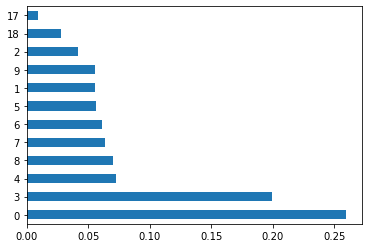

In [104]:
feat_importances = pd.Series(rf.feature_importances_, index=data_test.columns)
feat_importances.nlargest(12).plot(kind='barh')